# **kMeans 알고리즘을 적용하여 확인적 군집분석을 수행하시오.**
>변수 설명 ) tot_price : 총구매액, buy_count : 구매횟수,
                   visit_count : 매장방문횟수, avg_price : 평균구매액

In [1]:
#필요한 모듈 불러오기
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

## 1) 데이터 불러오기 및 탐색

In [8]:
sales = pd.read_csv("/content/product_sales.csv")
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tot_price    150 non-null    float64
 1   visit_count  150 non-null    float64
 2   buy_count    150 non-null    float64
 3   avg_price    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [3]:
print(sales.shape)
print(type(sales))

(150, 4)
<class 'pandas.core.frame.DataFrame'>


## 2) KMeans 를 이용하여 3개의 군집으로 군집화

2-1) KMeans 모델을 생성하세요. 군집은 3개로 군집화하세요.

In [4]:
#모델 생성
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(sales)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

2-2) 모델을 훈련하고 예측치 생성하고 이 결과를 pred라는 변수에 저장하세요.

In [5]:
pred = kmeans.fit_predict(sales)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2-3) 원형 데이터(sales)에 예측치(변수명:cluster)를 추가하세요.

In [9]:
salesDF = sales.copy()

In [10]:
sales['cluster'] = pred

In [11]:
sales.head()

,tot_price,visit_count,buy_count,avg_price,cluster
0,5.0,0.2,3.0,1.6,1
1,5.0,0.4,3.4,1.6,1
2,5.2,0.2,3.5,1.5,1
3,5.2,0.2,3.0,1.4,1
4,4.7,0.2,3.2,1.6,1


## 3) 군집화 시각화
: 전체 데이터를 2차원으로 축소한 뒤 시각화하세요.

3-1) cluster 변수를 제외한 sales 데이터를 salesDF라는 이름으로 변수에 저장하세요.

In [12]:
salesDF.head()

,tot_price,visit_count,buy_count,avg_price
0,5.0,0.2,3.0,1.6
1,5.0,0.4,3.4,1.6
2,5.2,0.2,3.5,1.5
3,5.2,0.2,3.0,1.4
4,4.7,0.2,3.2,1.6


3-2) salesDF 데이터를 이용하여 2차원으로 차원축소 한 후 그 결과를 sales에 pca_x, pca_y 이름으로 저장하세요.

In [20]:
#차원 축소 한 후 변형된 값 임의의 변수에 저장
pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(salesDF)
sales_pca = pca.transform(salesDF)
sales['pca_x'] = sales_pca[:,0]
sales['pca_y'] = sales_pca[:,1]
sales.head()



,tot_price,visit_count,buy_count,avg_price,cluster,pca_x,pca_y
0,5.0,0.2,3.0,1.6,1,-3.558628,-0.104877
1,5.0,0.4,3.4,1.6,1,-3.488411,0.327157
2,5.2,0.2,3.5,1.5,1,-3.616660,0.645447
3,5.2,0.2,3.0,1.4,1,-3.698638,0.104067
4,4.7,0.2,3.2,1.6,1,-3.728319,-0.123412


3-3) pca_x를 x축, pca_y를 y축으로 하여 산점도를 그리세요. 색으로 각 점이 군집에 따라 구분되도록 하세요. (단, 각 군집별로 마커 모양 구분하지 않고 오직 색으로만 구분합니다.)

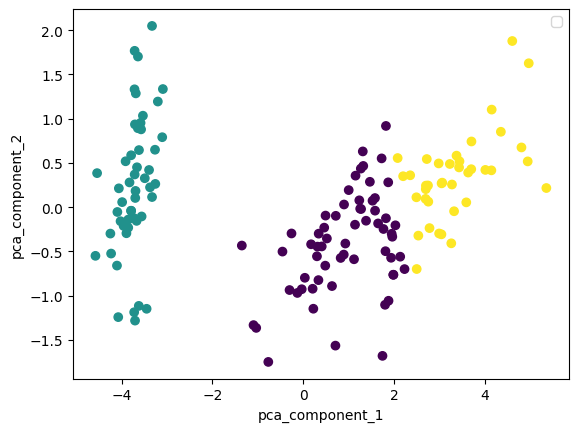

In [24]:
# pca_component_1을 x축, pca_component_2를 y축으로 scatter plot 수행
plt.scatter(sales['pca_x'], sales['pca_y'], c=sales['cluster'])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

## 4) 군집평가: 실루엣 계수 구하기

In [25]:
#시각화를 위하여 사용했던 차원 축소 관련 계수 삭제
sales=sales.drop(['pca_x','pca_y'], axis=1)

#cluster 행을 제외한 순수 데이터 sales_data로 저장
sales_data=sales.drop('cluster', axis=1)

In [26]:
sales.head()

,tot_price,visit_count,buy_count,avg_price,cluster
0,5.0,0.2,3.0,1.6,1
1,5.0,0.4,3.4,1.6,1
2,5.2,0.2,3.5,1.5,1
3,5.2,0.2,3.0,1.4,1
4,4.7,0.2,3.2,1.6,1


In [27]:
sales_data.head()

,tot_price,visit_count,buy_count,avg_price
0,5.0,0.2,3.0,1.6
1,5.0,0.4,3.4,1.6
2,5.2,0.2,3.5,1.5
3,5.2,0.2,3.0,1.4
4,4.7,0.2,3.2,1.6


4-1) sales의 모든 데이터에 실루엣 계수를 구하고 실루엣 계수 칼럼을 추가하세요.

In [28]:
#sales의 모든 데이터에 실루엣 계수 구하기
score_samples = silhouette_samples(sales, sales['cluster'])
print('silhouette_samples() return 값의 shape : ', score_samples.shape)


silhouette_samples() return 값의 shape :  (150,)


In [29]:
#sales에 실루엣 계수 칼럼 추가
sales['silhouette'] = score_samples

In [30]:
sales.head()

,tot_price,visit_count,buy_count,avg_price,cluster,silhouette
0,5.0,0.2,3.0,1.6,1,0.800744
1,5.0,0.4,3.4,1.6,1,0.812475
2,5.2,0.2,3.5,1.5,1,0.815677
3,5.2,0.2,3.0,1.4,1,0.797805
4,4.7,0.2,3.2,1.6,1,0.809280


4-2) 모든 데이터의 평균 실루엣 계수를 구하세요.

In [31]:
#모든 데이터의 평균 실루엣 계수 값을 구하기
average_score = silhouette_score(sales, sales['cluster'])
print('Silhouette Analysis Score : {0:.3f}'.format(average_score))

Silhouette Analysis Score : 0.670


4-3) 군집별 평균 실루엣 계수를 구하세요.

In [32]:
#군집별 평균 실루엣 계수 구하기
sales.groupby('cluster')['silhouette'].mean()

cluster
0    0.612467
1    0.765230
2    0.642197
Name: silhouette, dtype: float64